**LABORATORIO 2 - AGRUPACION  INTELIGENCIA DE NEGOCIOS - ISIS3301**

## Descripcion del problema

BancAlpes es una entidad bancaria que está realizando una campaña de fidelización para aumentar la retención de clientes.
Esta campaña busca ofrecer los mejores productos, servicios y recomendaciones a sus clientes de acuerdo con sus características.
Por esta razón, ha recurrido a ustedes como consultores para que le entreguen al equipo de marketing información que pueda ayudarlos a orientar mejor sus campañas.
En particular, el grupo de marketing espera que le provean grupos a los cuales pueden dirigir sus campañas y las caracteristicas de los clientes en dichos grupos.
BancAlpes considera que esta nueva estrategia de marketing le permitirá aumentar el consumo de productos y servicios y por supuesto, aumentar la retención de clientes.

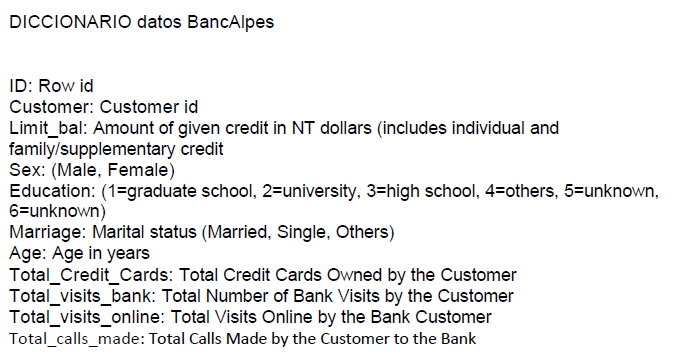

### **1. Importacion de librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sklearn
import warnings


### **2. Perfilamiento y entendimiento de datos**

#### **Lectura de los datos**
Visualizar los datos, mirar que se hayan cargado bien

In [2]:
df=pd.read_csv('202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8', index_col=0)
df = df.copy()
df.reset_index()
df.drop_duplicates()
df.head()

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,20000,Female,2,Married,24,2,1,1,0
1,2,38414,120000,Female,2,Single,26,3,0,10,9
2,3,17341,90000,Female,2,Single,34,7,1,3,4
3,4,40496,50000,Female,2,Married,37,5,1,1,?
4,5,47437,50000,Male,2,Married,57,6,0,12,3
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108,280000,Male,2,Married,39,10,1,10,0
656,657,60732,290000,Female,3,Single,27,10,1,13,2
657,658,53834,190000,Female,1,Single,28,8,1,9,1
658,659,80655,80000,Female,1,Single,23,10,1,15,0


,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3
...,...,...,...,...,...,...,...,...,...,...
656,51108,280000,Male,2,Married,39,10,1,10,0
657,60732,290000,Female,3,Single,27,10,1,13,2
658,53834,190000,Female,1,Single,28,8,1,9,1


,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


#### **Entendimiento de los datos**

En esta etapa se busca entender como manejan las ausencias el negocio, verificar que se respete el diccionario y visualizar los datos originales. Si hay algun impedimento relacionado con la libreria de pandas para realizar el entendimiento de los datos los cambios deben hacerse en esta etapa.

In [3]:
df.shape

(660, 10)

Se verifica el tipo de dato de las variables

In [4]:
df.info()
# Se deben cambiar los tipos de datos para las variables numericas y no hay nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             660 non-null    object
 1   Limit_bal            660 non-null    object
 2   Sex                  660 non-null    object
 3   Education            660 non-null    object
 4   Marriage             660 non-null    object
 5   Age                  660 non-null    object
 6   Total_Credit_Cards   660 non-null    object
 7   Total_visits_bank    660 non-null    object
 8   Total_visits_online  660 non-null    object
 9   Total_calls_made     660 non-null    object
dtypes: object(10)
memory usage: 56.7+ KB


In [5]:
# Escojo las variables numericas
cat = ['Sex','Marriage']
num = ['Customer','Limit_bal','Education','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

df[num] = df[num].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             658 non-null    float64
 1   Limit_bal            659 non-null    float64
 2   Sex                  660 non-null    object 
 3   Education            658 non-null    float64
 4   Marriage             660 non-null    object 
 5   Age                  659 non-null    float64
 6   Total_Credit_Cards   658 non-null    float64
 7   Total_visits_bank    656 non-null    float64
 8   Total_visits_online  659 non-null    float64
 9   Total_calls_made     658 non-null    float64
dtypes: float64(8), object(2)
memory usage: 56.7+ KB


In [6]:
#Se buscan problemas de nulidad
df.isnull().sum()

Customer               2
Limit_bal              1
Sex                    0
Education              2
Marriage               0
Age                    1
Total_Credit_Cards     2
Total_visits_bank      4
Total_visits_online    1
Total_calls_made       2
dtype: int64

Correccion de variables categoricas

In [7]:
df['Sex'].value_counts()

Female    372
Male      273
M           3
Mael        3
F           3
f           2
Fmale       1
9           1
-           1
Femael      1
Name: Sex, dtype: int64

In [8]:
# Dejo solo los valores Female y Male como unicas variables, y las inconsistencias se llenan con la moda
df['Sex'] = df['Sex'].apply(lambda x: 'Female' if str.lower(x)[0] == 'f' else('Male' if str.lower(x)[0] == 'm' else df['Sex'].mode()[0]) )
df['Sex'].value_counts()

Female    381
Male      279
Name: Sex, dtype: int64

In [9]:
df['Marriage'].value_counts()

Single     379
Married    260
Others       9
1            5
2            3
-            2
0            1
?            1
Name: Marriage, dtype: int64

In [10]:
# Dejo solo los valores Single,Male y Other como unicas variables, y las inconsistencias se llenan con la moda
df['Marriage'] = df['Marriage'].apply(lambda x: df['Marriage'].mode()[0] if x not in ['Single','Married','Others'] else x)
df['Marriage'].value_counts()

Single     391
Married    260
Others       9
Name: Marriage, dtype: int64

In [11]:
df['Education'].value_counts()

2.0    288
1.0    264
3.0     99
5.0      3
4.0      2
6.0      2
Name: Education, dtype: int64

In [12]:
#Los nulos se llenan con la moda
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Education'].value_counts()

2.0    290
1.0    264
3.0     99
5.0      3
4.0      2
6.0      2
Name: Education, dtype: int64

Visualización de los datos

array([[<AxesSubplot:title={'center':'Customer'}>,
        <AxesSubplot:title={'center':'Limit_bal'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>,
        <AxesSubplot:title={'center':'Total_visits_bank'}>],
       [<AxesSubplot:title={'center':'Total_visits_online'}>,
        <AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

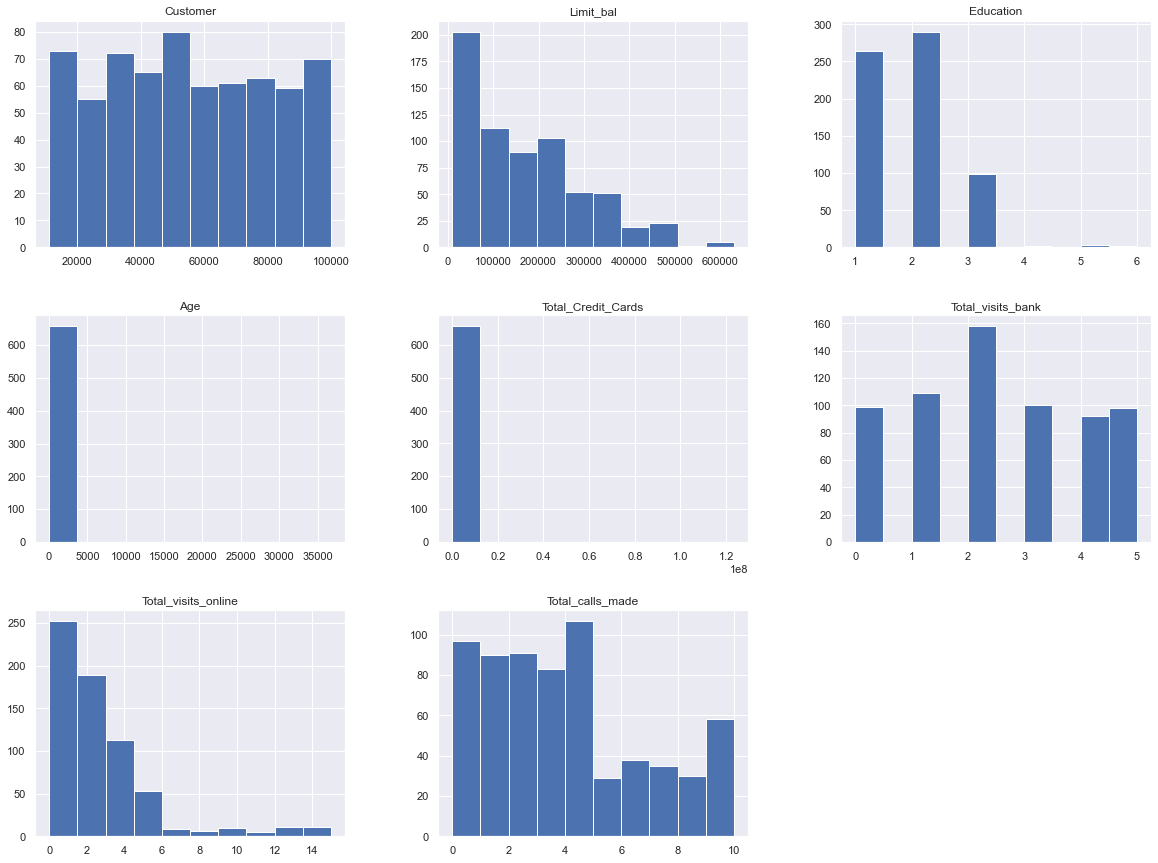

In [13]:
df.hist( figsize=(20,15))
plt.show()

In [14]:
df.describe()

,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,658.000000,659.000000,660.000000,659.000000,6.580000e+02,656.00000,659.000000,658.000000
mean,55180.056231,170000.000000,1.781818,95.218513,1.876290e+05,2.41311,2.602428,3.579027
std,25651.348197,129739.041329,0.777707,1432.660847,4.812847e+06,1.63130,2.936469,2.868076
min,11265.000000,10000.000000,1.000000,21.000000,1.000000e+00,0.00000,0.000000,0.000000
25%,33875.500000,50000.000000,1.000000,28.000000,3.000000e+00,1.00000,1.000000,1.000000
50%,53907.000000,140000.000000,2.000000,33.000000,5.000000e+00,2.00000,2.000000,3.000000
75%,77321.500000,240000.000000,2.000000,41.000000,6.000000e+00,4.00000,4.000000,5.000000
max,99843.000000,630000.000000,6.000000,36745.000000,1.234568e+08,5.00000,15.000000,10.000000


Correccion variables numericas

In [15]:
# Se busca si los 0's se estan manejando como ausencias
df[df==0].count()

Customer                 0
Limit_bal                0
Sex                      0
Education                0
Marriage                 0
Age                      0
Total_Credit_Cards       0
Total_visits_bank       99
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [16]:
df[df['Age']>100]['Age'].value_counts(ascending=False)

789.0      1
36745.0    1
2202.0     1
Name: Age, dtype: int64

In [17]:
#Se reemplazan los valores de Age>100 por la media sin estos.
df['Age'].values[df['Age']>100] = int(df[df['Age']<100]['Age'].mean())
df[df['Age']>100]['Age'].value_counts(ascending=True)

Series([], Name: Age, dtype: int64)

In [18]:
df[df['Total_Credit_Cards']>50]['Total_Credit_Cards'].value_counts(ascending=True)

123456789.0    1
Name: Total_Credit_Cards, dtype: int64

In [19]:
#Se reemplazan los valores de Credit cards>50 por la media sin estos.
df['Total_Credit_Cards'].values[df['Total_Credit_Cards']>50] = int(df[df['Total_Credit_Cards']<50]['Total_Credit_Cards'].mean())
df[df['Total_Credit_Cards']>50]['Total_Credit_Cards'].value_counts(ascending=True)

Series([], Name: Total_Credit_Cards, dtype: int64)

In [20]:
# Se buscan problemas en las otras variables
df['Total_visits_bank'].value_counts(ascending=True)
df['Total_visits_online'].value_counts(ascending=True)
df['Total_calls_made'].value_counts(ascending=True)
df['Limit_bal'].value_counts(ascending=True)

4.0     92
5.0     98
0.0     99
3.0    100
1.0    109
2.0    158
Name: Total_visits_bank, dtype: int64

14.0      1
6.0       1
9.0       4
13.0      5
11.0      5
10.0      6
12.0      6
8.0       6
7.0       7
15.0     10
3.0      44
5.0      53
4.0      69
1.0     109
0.0     144
2.0     189
Name: Total_visits_online, dtype: int64

10.0     26
5.0      29
8.0      30
9.0      32
7.0      35
6.0      38
3.0      83
1.0      90
2.0      91
0.0      97
4.0     107
Name: Total_calls_made, dtype: int64

460000.0     1
620000.0     1
420000.0     1
580000.0     1
510000.0     1
490000.0     1
600000.0     1
470000.0     2
630000.0     2
410000.0     2
480000.0     2
370000.0     2
340000.0     3
440000.0     4
450000.0     4
390000.0     4
350000.0     5
380000.0     5
290000.0     6
330000.0     6
310000.0     6
320000.0     6
190000.0     6
40000.0      6
300000.0     7
250000.0     7
10000.0      8
270000.0     8
400000.0     8
170000.0     9
220000.0    10
260000.0    12
70000.0     13
280000.0    13
500000.0    13
120000.0    13
150000.0    14
90000.0     15
110000.0    15
130000.0    16
240000.0    16
230000.0    17
160000.0    17
210000.0    20
140000.0    20
180000.0    24
100000.0    24
60000.0     24
360000.0    24
80000.0     29
30000.0     31
200000.0    33
20000.0     38
50000.0     83
Name: Limit_bal, dtype: int64

In [21]:
# Se llenan las pocas ausencias con la media de cada clase
df = df.fillna(df.mean().astype(int))
df.isnull().sum()
df[df.isna().any(axis=1)]

Customer               0
Limit_bal              0
Sex                    0
Education              0
Marriage               0
Age                    0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,


Se visualiza los datos resultantes

In [22]:
df.describe()

,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55180.056061,170000.000000,1.781818,35.080303,4.713636,2.410606,2.601515,3.577273
std,25612.393963,129640.567659,0.777707,9.337277,2.162193,1.626658,2.934334,2.863898
min,11265.000000,10000.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,33952.500000,50000.000000,1.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,53924.000000,140000.000000,2.000000,33.500000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,240000.000000,2.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,630000.000000,6.000000,75.000000,10.000000,5.000000,15.000000,10.000000


array([[<AxesSubplot:title={'center':'Customer'}>,
        <AxesSubplot:title={'center':'Limit_bal'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>,
        <AxesSubplot:title={'center':'Total_visits_bank'}>],
       [<AxesSubplot:title={'center':'Total_visits_online'}>,
        <AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

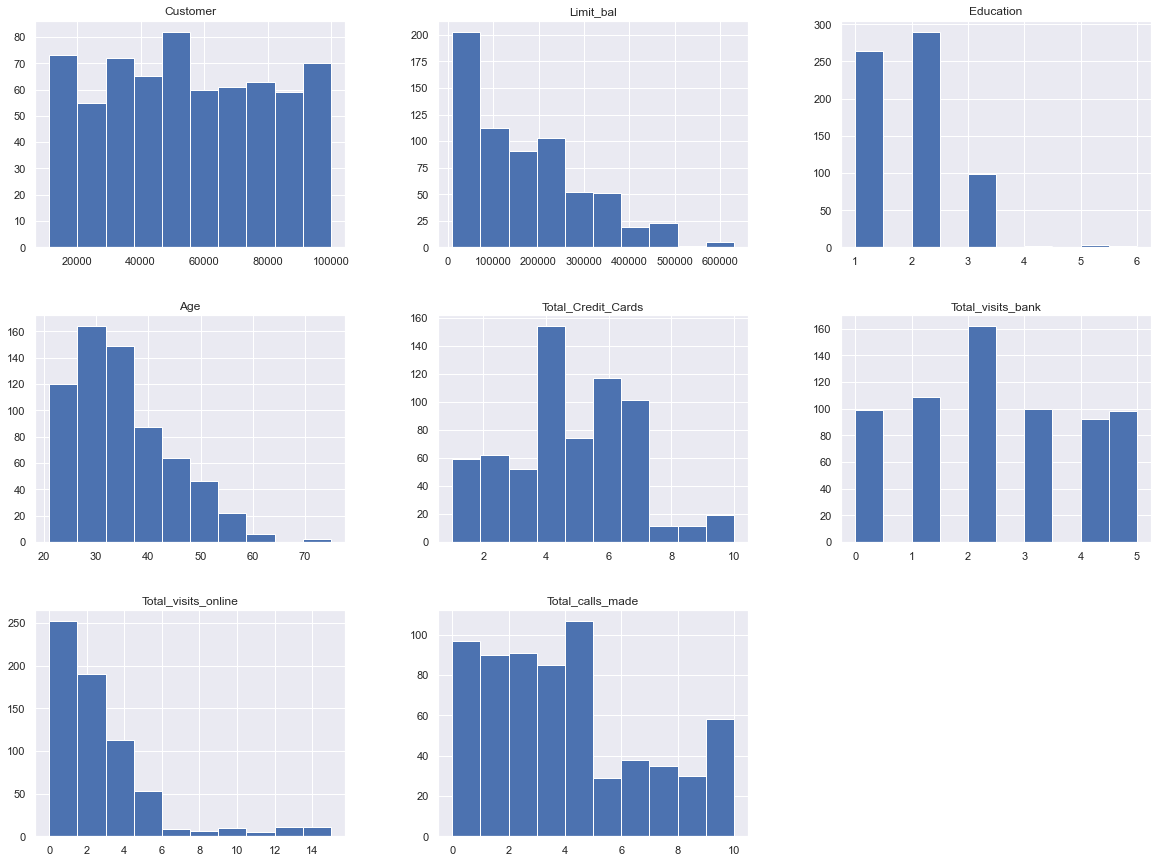

In [23]:
df.hist( figsize=(20,15))
plt.show()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

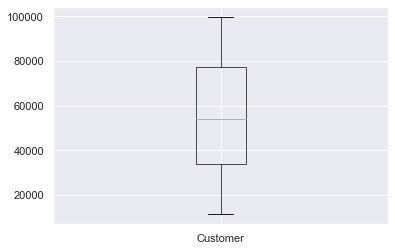

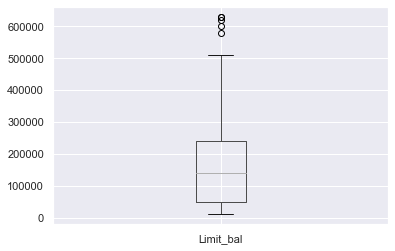

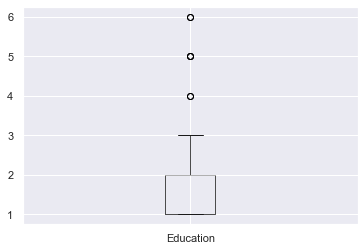

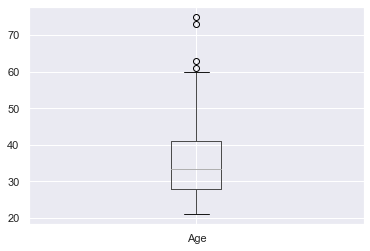

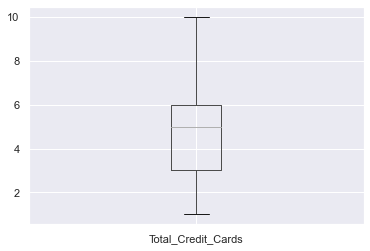

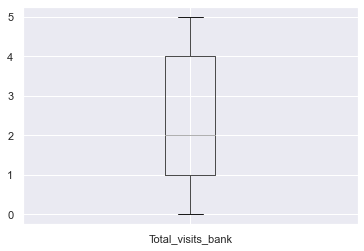

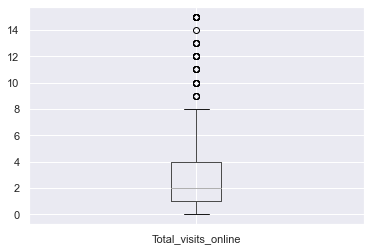

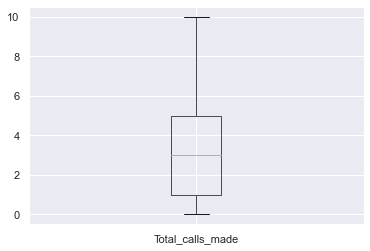

In [24]:
df1 = df.select_dtypes(exclude=['object'])
for column in df1:
    plt.figure()
    df.boxplot([column])

### **3. Preparacion de datos**

Se construye el conjunto de entrenamiento y el conjunto test

#### **Separacion de datos**
Se elimina la variable Customer al ser no representativa

In [25]:
X = df.drop(['Customer'],axis=1)
X.head()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,
1,20000.0,Female,2.0,Married,24.0,2.0,1.0,1.0,0.0
2,120000.0,Female,2.0,Single,26.0,3.0,0.0,10.0,9.0
3,90000.0,Female,2.0,Single,34.0,7.0,1.0,3.0,4.0
4,50000.0,Female,2.0,Married,37.0,5.0,1.0,1.0,3.0
5,50000.0,Male,2.0,Married,57.0,6.0,0.0,12.0,3.0


#### **Transformacion de datos**

Separar las variables categoricas y numericas para la construccion del pipeline

In [26]:
nominal_cat_features = ['Sex','Marriage','Education']
num_features = ['Limit_bal','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [27]:
pipeline = ColumnTransformer([
    ("onehot_encoder", OneHotEncoder(), nominal_cat_features),
],remainder='passthrough' )

pipelineNormal = ColumnTransformer([
    ("std_scaler", MinMaxScaler(), num_features),
    ("onehot_encoder", OneHotEncoder(), nominal_cat_features),
])

pipelineStandard = ColumnTransformer([
    ("std_scaler", StandardScaler(), num_features),
    ("onehot_encoder", OneHotEncoder(), nominal_cat_features),
])



# Codigo que trae los nombres de las variables categoricas, que es llamado por los datos transformados
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


**Se pueden escoger distintos conjuntos de datos transformados para la construccion del modelo:**

*   X_lbl: Solo transforma vars categoricas
*   X_norm: Normaliza vars numericas y transforma vars categoricas
*   X_stand: Estandariza vars numericas y transforma vars categoricas

In [28]:
#X_lbl = pd.DataFrame(pipeline.fit_transform(X),columns=get_feature_names(pipeline))
#X_lbl.head()

X_norm = pd.DataFrame(pipelineNormal.fit_transform(X),columns=get_feature_names(pipelineNormal))
X_norm.head()

X_stand = pd.DataFrame(pipelineStandard.fit_transform(X),columns=get_feature_names(pipelineStandard))
X_stand.head()

<ipython-input-27-3f1c6ef1df18>:47: UserWarning: Transformer std_scaler (type MinMaxScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,std_scaler__Limit_bal,std_scaler__Age,std_scaler__Total_Credit_Cards,std_scaler__Total_visits_bank,std_scaler__Total_visits_online,std_scaler__Total_calls_made,onehot_encoder__x0_Female,onehot_encoder__x0_Male,onehot_encoder__x1_Married,onehot_encoder__x1_Others,onehot_encoder__x1_Single,onehot_encoder__x2_1.0,onehot_encoder__x2_2.0,onehot_encoder__x2_3.0,onehot_encoder__x2_4.0,onehot_encoder__x2_5.0,onehot_encoder__x2_6.0
0,0.016129,0.055556,0.111111,0.2,0.066667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.177419,0.092593,0.222222,0.0,0.666667,0.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.129032,0.240741,0.666667,0.2,0.200000,0.4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.064516,0.296296,0.444444,0.2,0.066667,0.3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.064516,0.666667,0.555556,0.0,0.800000,0.3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<ipython-input-27-3f1c6ef1df18>:47: UserWarning: Transformer std_scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,std_scaler__Limit_bal,std_scaler__Age,std_scaler__Total_Credit_Cards,std_scaler__Total_visits_bank,std_scaler__Total_visits_online,std_scaler__Total_calls_made,onehot_encoder__x0_Female,onehot_encoder__x0_Male,onehot_encoder__x1_Married,onehot_encoder__x1_Others,onehot_encoder__x1_Single,onehot_encoder__x2_1.0,onehot_encoder__x2_2.0,onehot_encoder__x2_3.0,onehot_encoder__x2_4.0,onehot_encoder__x2_5.0,onehot_encoder__x2_6.0
0,-1.157923,-1.187574,-1.255991,-0.867838,-0.546199,-1.250040,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.385974,-0.973216,-0.793147,-1.483061,2.523263,1.894914,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.617559,-0.115786,1.058230,-0.867838,0.135904,0.147718,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.926338,0.205751,0.132542,-0.867838,-0.546199,-0.201722,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.926338,2.349328,0.595386,-1.483061,3.205365,-0.201722,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **4. Modelamiento**

##### ***4.1 k-means***

In [29]:
#Utilizamos el método del codo para encontrar número óptimo de clústeres.
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

C:\Users\cajiv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


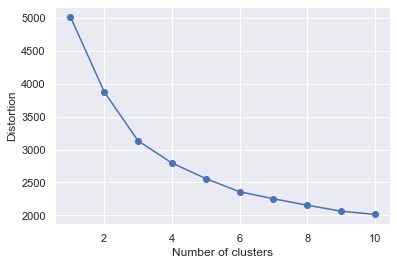

In [30]:
#Vemos que el codo no es muy evidente pero nos vamos por el valor de 3
plot_distortion(X_stand.to_numpy(),1,11)

In [31]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

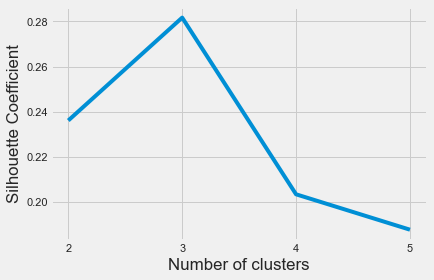

In [32]:
# Para definir el número de clusters con mas certeza graficamos clusters vs Silhouette Coefficient
#Mantenemos el k =3 debido a que este parece tener la mejor relación con el coeficiente.
plot_selectK_silhoute(X_stand,
                    k_min=2, 
                    k_max=6)

In [33]:
#Creamos el modelo
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans = kmeans.fit(X_stand)

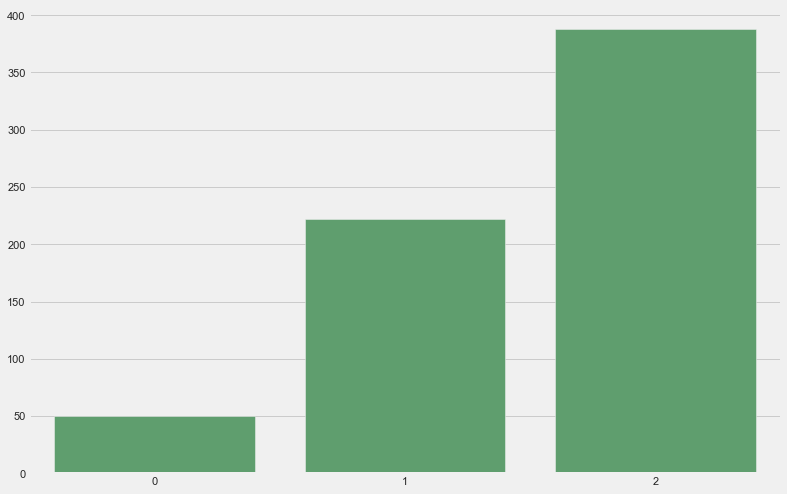

In [34]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
X_stand['Cluster'] = labels

cluster_distrib = X_stand['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='g');

In [35]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
X_stand.groupby('Cluster').count()

,std_scaler__Limit_bal,std_scaler__Age,std_scaler__Total_Credit_Cards,std_scaler__Total_visits_bank,std_scaler__Total_visits_online,std_scaler__Total_calls_made,onehot_encoder__x0_Female,onehot_encoder__x0_Male,onehot_encoder__x1_Married,onehot_encoder__x1_Others,onehot_encoder__x1_Single,onehot_encoder__x2_1.0,onehot_encoder__x2_2.0,onehot_encoder__x2_3.0,onehot_encoder__x2_4.0,onehot_encoder__x2_5.0,onehot_encoder__x2_6.0
Cluster,,,,,,,,,,,,,,,,,
0,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
1,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
2,388,388,388,388,388,388,388,388,388,388,388,388,388,388,388,388,388


Text(0.5, 1.0, 'Clusters de clientes')

Text(0.5, 0, 'std_scaler__Limit_bal')

Text(0, 0.5, 'std_scaler__Age')

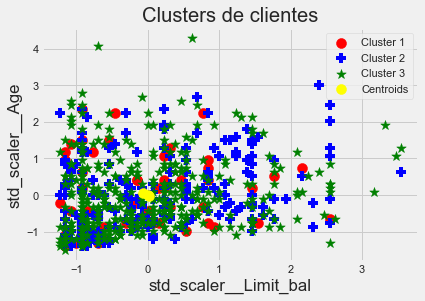

In [36]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 0, 0], X_stand.to_numpy()[kmeans.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 1, 0], X_stand.to_numpy()[kmeans.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 2, 0], X_stand.to_numpy()[kmeans.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters de clientes')
plt.xlabel(X_stand.columns[0])
plt.ylabel(X_stand.columns[1])
plt.legend()
plt.show()

Text(0.5, 1.0, 'Clusters of songs')

Text(0.5, 0, 'std_scaler__Age')

Text(0, 0.5, 'std_scaler__Total_Credit_Cards')

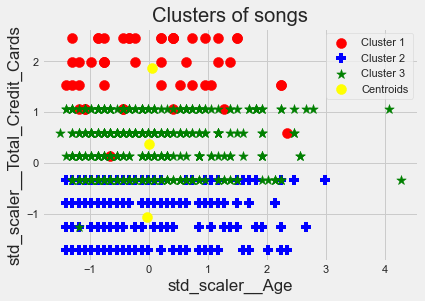

In [37]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 0, 1], X_stand.to_numpy()[kmeans.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 1, 1], X_stand.to_numpy()[kmeans.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(X_stand.to_numpy()[kmeans.labels_ == 2, 1], X_stand.to_numpy()[kmeans.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(X_stand.columns[1])
plt.ylabel(X_stand.columns[2])
plt.legend()
plt.show()

Text(0.5, 0, 'std_scaler__Limit_bal')

Text(0.5, 0, 'std_scaler__Age')

Text(0.5, 0, 'std_scaler__Total_Credit_Cards')

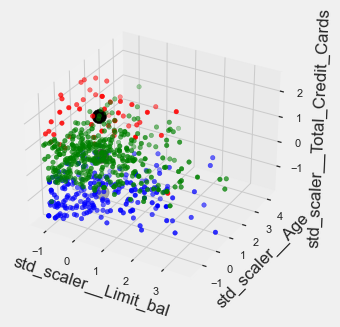

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X_stand.to_numpy()[kmeans.labels_ == 0, 0], X_stand.to_numpy()[kmeans.labels_ == 0, 1], X_stand.to_numpy()[kmeans.labels_ == 0, 2],color='red')
ax.scatter(X_stand.to_numpy()[kmeans.labels_ == 2, 0], X_stand.to_numpy()[kmeans.labels_ == 2, 1], X_stand.to_numpy()[kmeans.labels_ == 2, 2],color='green')
ax.scatter(X_stand.to_numpy()[kmeans.labels_ == 1, 0], X_stand.to_numpy()[kmeans.labels_ == 1, 1], X_stand.to_numpy()[kmeans.labels_ == 1, 2],color='blue')

ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(X_stand.columns[0])
ax.set_ylabel(X_stand.columns[1])
ax.set_zlabel(X_stand.columns[2])
plt.show()

Evaluación de los clusters

In [39]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


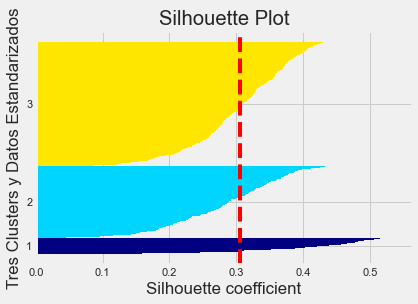

In [40]:
plot_silhouette(data = X_stand, 
                labels = kmeans.labels_, 
                ylabel = 'Tres Clusters y Datos Estandarizados')

In [48]:
#Creamos el modelo con datos normalizados para comparar
kmeans1 = KMeans(n_clusters=3, random_state=0) 
kmeans1 = kmeans1.fit(X_norm)

[0 1 2]


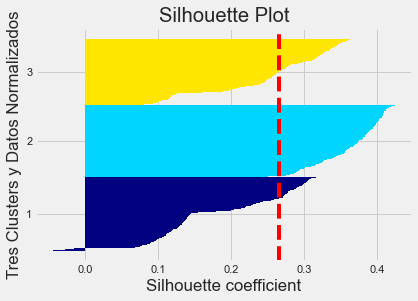

In [49]:
plot_silhouette(data = X_norm, 
                labels = kmeans1.labels_, 
                ylabel = 'Tres Clusters y Datos Normalizados')

Podemos ver que utilizar los datos estandarizados generan un mejor coeficiente de silueta. 

##### ***4.2 DBSCAN***

##### ***4.3 Hierarchical Clustering***

### **5. Comparacion de Modelos**